Introduction<br>
In modern machine learning tasks, selecting the most relevant features is crucial for building robust, interpretable, and computationally efficient models. Feature selection can help reduce overfitting, improve model accuracy, and decrease training time. This report presents a detailed study on two major categories of feature selection techniques: Wrapper Methods and Embedded Methods.

Wrapper Methods evaluate various subsets of features by training a model on each subset. Techniques such as Forward Selection, Backward Elimination, Recursive Feature Elimination (RFE), and Exhaustive Search are common examples.
Embedded Methods incorporate feature selection as part of the model training process. Regularization techniques such as Lasso (L1 regularization) not only help in reducing overfitting but also automatically shrink the coefficients of less important features to zero.

 Dataset Description<br>
Dataset: Wine Quality (red wine)<br>
Source: UCI Machine Learning Repository<br >
Features:

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
Target: quality
<br> Data Loading and Cleaning
Since the dataset is semicolon-delimited, it is important to load it with the correct separator. We also clean the column names to remove any extraneous quotes or whitespace.

In [1]:
import pandas as pd

# Load the Wine Quality dataset using the correct delimiter (semicolon)
df = pd.read_csv("winequality-red.csv", sep=";")

# Clean column names in case of extra quotes or spaces
df.columns = df.columns.str.replace('"', '').str.strip()

# Verify that the columns are correctly parsed
print("Columns:", df.columns.tolist())




Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


We separate the features (X) from the target variable (y) and split the data into training and testing sets to avoid data leakage during the feature selection process

In [2]:
# Clean column names by removing extra quotes and whitespace
df.columns = df.columns.str.replace('"', '').str.strip()

# Separate features and target variable
X = df.drop("quality", axis=1)
y = df["quality"]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Wrapper Methods
Wrapper methods use a predictive model to evaluate different subsets of features. In our study, we implement the following wrapper methods:

a) Forward Selection
Starts with an empty set of features and adds one feature at a time that maximally improves the model’s performance. We use scikit-learn’s SequentialFeatureSelector.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize a linear regression estimator
estimator = LinearRegression()

# Forward selection: start with no features, add one at a time
sfs_forward = SequentialFeatureSelector(estimator, 
                                        n_features_to_select=5, 
                                        direction='forward',
                                        cv=5,
                                        n_jobs=-1)
sfs_forward.fit(X_train, y_train)

# Get selected features
selected_features_forward = X_train.columns[sfs_forward.get_support()]
print("Selected features (Forward Selection):", selected_features_forward.tolist())




Selected features (Forward Selection): ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']


Starts with all features and removes one at a time—the least significant feature—until a desired number of features remains.

In [4]:
# Backward elimination: start with all features, remove one at a time
sfs_backward = SequentialFeatureSelector(estimator, 
                                         n_features_to_select=5, 
                                         direction='backward',
                                         cv=5,
                                         n_jobs=-1)
sfs_backward.fit(X_train, y_train)

# Get selected features
selected_features_backward = X_train.columns[sfs_backward.get_support()]
print("Selected features (Backward Elimination):", selected_features_backward.tolist())


Selected features (Backward Elimination): ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']


 Recursive Feature Elimination (RFE)
RFE works by recursively removing the least important feature based on the model’s coefficients until only the desired number of features remains.

In [5]:
from sklearn.feature_selection import RFE

# Initialize RFE with the linear regression estimator to select the top 5 features
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Extract and print selected features from RFE
selected_features_rfe = X_train.columns[selector.support_]
print("Selected features (RFE):", selected_features_rfe.tolist())


Selected features (RFE): ['volatile acidity', 'chlorides', 'density', 'pH', 'sulphates']


Exhaustive Search <br >
This method evaluates every possible combination of features to find the best subset. Due to its computational intensity, it is typically only feasible for datasets with a small number of features. We use the ExhaustiveFeatureSelector from the mlxtend library.

In [6]:

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Exhaustive search using a linear regression estimator
efs = EFS(estimator,
          min_features=5,
          max_features=5,
          scoring='r2',  # or any scoring metric you prefer
          print_progress=True,
          cv=5,
          n_jobs=-1)

efs = efs.fit(X_train, y_train)

# Selected feature indices and names
selected_features_exhaustive = X_train.columns[list(efs.best_idx_)]
print("Selected features (Exhaustive Search):", selected_features_exhaustive.tolist())




Features: 462/462

Selected features (Exhaustive Search): ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']


Embedded Methods<br>
Embedded methods perform feature selection as part of the model training process. In this study, we use LassoCV, which applies L1 regularization to shrink coefficients to zero for less important features.

In [7]:
from sklearn.linear_model import LassoCV

# Use LassoCV to perform embedded feature selection with cross-validation
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Create a series with feature coefficients
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Select features with non-zero coefficients
selected_features_lasso = coef[coef != 0].index
print("Selected features (LassoCV):", list(selected_features_lasso))



Selected features (LassoCV): ['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


Visualizing the Lasso coefficients can help interpret the relative importance of each feature.

Matplotlib is building the font cache; this may take a moment.


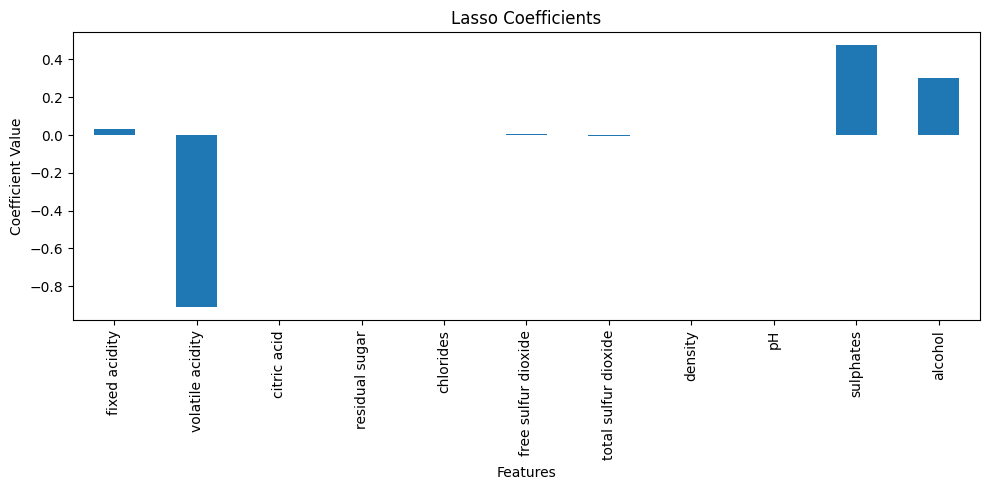

In [8]:
import matplotlib.pyplot as plt

# Plot the coefficients from the Lasso model
plt.figure(figsize=(10, 5))
coef.plot(kind='bar')
plt.title("Lasso Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


 Results Summary and Detailed Comparison<br>
Summary of Selected Features<br>
Forward Selection:<br>
['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']

Backward Elimination:<br>
['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']

RFE:<br>
['volatile acidity', 'chlorides', 'density', 'pH', 'sulphates']

Exhaustive Search:<br>
['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']

LassoCV:<br>
['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

Detailed Comparison<br>
Consistency Across Methods:<br>
The three wrapper methods (Forward Selection, Backward Elimination, and Exhaustive Search) all converge on the same subset of features:<br>
['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']
This strong agreement implies that these features are consistently recognized as the most relevant predictors for wine quality when using a search-based method.

RFE's Divergence:<br>
RFE selected ['volatile acidity', 'chlorides', 'density', 'pH', 'sulphates']—differing by substituting density and pH for total sulfur dioxide and alcohol.

Inference:<br>
This difference suggests that the recursive elimination process, which relies on model coefficients, may detect interactions or non-linear relationships differently. Density and pH might carry useful information that, in combination with the other features, provide similar predictive power.<br>
Embedded Method (LassoCV) – A Broader Perspective:<br>
LassoCV identified a larger set of features:<br>
['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']<br>

Inference:<br>
LassoCV’s selection indicates that while some features have a relatively smaller effect (e.g., fixed acidity, residual sugar, free sulfur dioxide), their contributions are non-zero and may improve model performance. Lasso's regularization tends to be more inclusive, capturing subtle influences that the more rigid wrapper methods might exclude.

Inferences<br>
Key Consistent Features:<br>
Across all methods, volatile acidity, chlorides, and sulphates are consistently selected. This reinforces their importance in determining wine quality.

Method-Specific Insights:<br>

Wrapper Methods: Provide a concise and highly interpretable feature set, which is advantageous when model simplicity is desired.<br>
RFE: Its divergence suggests sensitivity to the method of eliminating features based on coefficient stability.<br>
LassoCV: Offers a more nuanced view by retaining additional features with small but non-zero impacts, potentially leading to improved predictive performance when these subtle effects are valuable.<br>
Practical Implication:<br>
The choice of feature selection method should depend on your goals. If you aim for the most interpretable model with a minimal set of features, the consensus from the wrapper methods is compelling. If your priority is to capture all influential signals—even those with modest effects—an embedded method like LassoCV may be preferable.

This study demonstrated the application of multiple feature selection techniques on the Wine Quality dataset:

Wrapper Methods (Forward Selection, Backward Elimination, Exhaustive Search, and RFE) generally converged on a subset of five key features, with RFE slightly differing by including density and pH.
Embedded Method (LassoCV) selected a broader feature set that includes additional predictors with smaller coefficients.
The consistency among several wrapper methods suggests that volatile acidity, chlorides, total sulfur dioxide, sulphates, and alcohol are critical predictors of wine quality. Meanwhile, LassoCV’s broader selection provides further insight into subtle influences from features such as fixed acidity, residual sugar, and free sulfur dioxide.